[Making the most of your colab subscription](https://colab.research.google.com/notebooks/pro.ipynb#scrollTo=23TOba33L4qf)  如何获取GPU和RAM的信息  

TPU (v2) = 1.76units/hr

P100 = 4units/hr

L4 = 4.82units/hr

V100 = 5units/hr

A100 =15units/hr

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
## Google Drive的相对路径，Git_AI_Projects专门存储AI有关的项目
! ls ./drive/MyDrive/Git_AI_Projects

Desktop.zip  DoppelGANger  GPUTaskScheduler  machine-learning-for-trading  Time-LLM


In [ ]:
# Clone github repository setup
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join
ROOT = '/content/drive'
# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'drive/MyDrive/Git_AI_Projects'
# replace with your Github username
GIT_USERNAME = "stjack01"
# definitely replace with your
# Replace with your github repository in this case we want
# to clone deep-learning-v2-pytorch repository
# GIT_REPOSITORY = "deep-learning-v2-pytorch"

PROJECT_PATH = join('', MY_GOOGLE_DRIVE_PATH)

# It's good to print out the value if you are not sure
print("PROJECT_PATH: ", PROJECT_PATH)

# In case we haven't created the folder already; we will create a folder in the project path
!mkdir "{PROJECT_PATH}"

# GIT_PATH = "https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git" this return 400 Bad Request for me
# Copy my own private projects!
# GIT_PATH_OWN = "https://" + GIT_TOKEN + "@github.com/" + GIT_USERNAME + "/" + GIT_REPOSITORY + ".git"
# print("GIT_PATH: ", GIT_PATH_OWN)
GIT_PATH = 'https://github.com/KimMeen/Time-LLM'


PROJECT_PATH:  drive/MyDrive/Git_AI_Projects
mkdir: cannot create directory ‘drive/MyDrive/Git_AI_Projects’: No such file or directory


## Option 1: copy github project to Google Drive folder


In [ ]:
%cd  "/content/drive/MyDrive/Git_AI_Projects/Time-LLM"


/content/drive/MyDrive/Git_AI_Projects/Time-LLM


In [ ]:
##    仅第一次需要clone Github
##  ! pwd
##  ! git clone "https://github.com/KimMeen/Time-LLM" # clone the github repository

/content/drive/MyDrive/Git_AI_Projects
Cloning into 'Time-LLM'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 165 (delta 45), reused 33 (delta 29), pack-reused 98
Receiving objects: 100% (165/165), 1.07 MiB | 9.72 MiB/s, done.
Resolving deltas: 100% (81/81), done.


## Option 2: copy all the files/folders from your cloned repository in google drive to Google Colab local run time

In [ ]:
#!git clone "{GIT_PATH}" ./temp               # clone github repository to temp folder
#!mv ./temp/* "/content/{PROJECT_PATH}"       # move all files/folders in temp folder to folder defined in project path
#!rm -rf ./temp                               # remove all the files/folders in temp folder
!rsync -aP --exclude=dataset/ ./*  ./            # use remote sync to copy from google drive to local runtime google colab
                                              # but exclude data folder
                                              # https://www.computerhope.com/unix/rsync.htm

sending incremental file list


In [ ]:

# 期望值：  /content/drive/MyDrive/Git_AI_Projects/Time-LLM
!pwd

/content/drive/MyDrive/Git_AI_Projects/Time-LLM


In [ ]:
# Install python package
!pip install accelerate==0.28.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 7.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!pip install deepspeed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 9.2 MB/s eta 0:00:00
  Created wheel for deepspeed: filename=deepspeed-0.14.2-py3-none-any.whl size=1432240 sha256=f7d6e958556321c77fd150d4f3a23b31c747ff8748de1bfd29a12ae5e43380b0
  Stored in directory: /root/.cache/pip/wheels/ea/7c/43/bed44d8414c099ff962b754f425f7ff77cc623cc8a98e0da70
Successfully built deepspeed


In [ ]:
!pip install mpi4py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 33.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.6-cp310-cp310-linux_x86_64.whl size=2746298 sha256=a32dbdda859f23535edf035ee8121520a979b99cf9d29a80fb731e87f5d34916
  Stored in directory: /root/.cache/pip/wheels/4c/ca/89/8fc1fb1c620afca13bb41c630b1f948bbf446e0aaa4b762e10
Successfully built mpi4py


In [ ]:
!pip install tqdm

In [ ]:
## https://github.com/KimMeen/Time-LLM/issues/45 ==> On google colab, only ONE gpu can be used at same time
## 执行模型的training，具体参考脚本


/content/drive/MyDrive/Git_AI_Projects/Time-LLM


In [ ]:
##  !bash ./scripts/TimeLLM_ETTh1.sh

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
checkpoint path == > ./checkpoints/long_term_forecast_ETTh1_512_96_TimeLLM_ETTh1_ftM_sl512_ll48_pl96_dm32_nh8_el2_dl1_df128_fc3_ebtimeF_Exp_0-TimeLLM-ETTh1
Namespace(task_name='long_term_forecast', is_training=1, model_id='ETTh1_512_96', model_comment='TimeLLM-ETTh1', model='TimeLLM', seed=2021, data='ETTh1', root_path='./dataset/ETT-small/', data_path='ETTh1.csv', features='M', target='OT', loader='modal', freq='h', checkpoints='./checkpoints/', seq_len=512, label_len=48, pred_len=96, seasonal_patterns='Monthly', enc_in=7, dec_in=7, c_out=7, d_model=32, n_heads=8, e_layers=2, d_layers=1, d_ff=128, moving_avg=25, factor=3, dropout=0.1, embed='timeF', activation='gelu', output_attention=False, patch_len=

In [ ]:
"""
  调用checkpoint来eval 模型，可以输出实际值和预测值的对比
  Namespace(task_name='long_term_forecast',
            is_training=1,
            model_id='ETTh1_512_96',
            model_comment='TimeLLM-ETTh1',
            model='TimeLLM',
            seed=2021,
            data='ETTh1',
            root_path='./dataset/ETT-small/',
            data_path='ETTh1.csv', features='M',
            target='OT',
            loader='modal',
            freq='h',
            checkpoints='./checkpoints/',
            seq_len=512,
            label_len=48,
            pred_len=96,
            seasonal_patterns='Monthly',
            enc_in=7,
            dec_in=7,
            c_out=7,
            d_model=32,
            n_heads=8,
            e_layers=2,
            d_layers=1,
            d_ff=128,
            moving_avg=25,
            factor=3,
            dropout=0.1,
            embed='timeF',
            activation='gelu',
            output_attention=False,
            patch_len=16,
            stride=8,
            prompt_domain=0,
            llm_model='GPT2',
            llm_dim=768,
            num_workers=10,
            itr=1,
            train_epochs=40,
            align_epochs=10,
            batch_size=24,
            eval_batch_size=8,
            patience=10,
            learning_rate=0.01,
            des='Exp',
            loss='MSE',
            lradj='type1',
            pct_start=0.2,
            use_amp=False,
            llm_layers=32,
            percent=100)

"""
import pdb

import argparse
import torch
from accelerate import Accelerator, DeepSpeedPlugin
from accelerate import DistributedDataParallelKwargs
from torch import nn, optim
from torch.optim import lr_scheduler
from tqdm import tqdm

from models import Autoformer, DLinear, TimeLLM

from data_provider.data_factory import data_provider
import time
import random
import numpy as np
import os

class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__
# num_hidden_layers = 3
args = {
  'task_name':'long_term_forecast',
  'model_id':'ETTh1_512_96',
  'model':'TimeLLM',
  'data':'ETTh1',
  'freq':'h',
  'features':'M',
  '':100,
  'seq_len':512,
  'label_len':48,
  'pred_len':96,
  'd_model':32,
  'n_heads':8,
  'e_layers':7,
  'd_layers':7,
  'd_ff':128,
  'factor':3,
  'embed':'timeF',
  'num_workers':10,
  'des':'Exp',
  'root_path':'./dataset/ETT-small/',
  'data_path':'ETTh1.csv',
  'llm_model':'GPT2',
  'llm_dim':768,
  # num_hidden_layers = 32
  'batch_size':24,
  'llm_layers':32,
  'dropout':0.1,
  'patch_len':16,
  'stride':8
}
print(dotdict(args).data)
#


ddp_kwargs = DistributedDataParallelKwargs(find_unused_parameters=True)
deepspeed_plugin = DeepSpeedPlugin(hf_ds_config='./ds_config_zero2.json')
accelerator = Accelerator(kwargs_handlers=[ddp_kwargs], deepspeed_plugin=deepspeed_plugin)


chp_path = './checkpoints/long_term_forecast_ETTh1_512_96_TimeLLM_ETTh1_ftM_sl512_ll48_pl96_dm32_nh8_el2_dl1_df128_fc3_ebtimeF_Exp_0-TimeLLM-ETTh1/checkpoint'
checkpoint = torch.load(chp_path)
for key, value in checkpoint.items():
    #print(key)
    pass
model = TimeLLM.Model(dotdict(args)).float()
model.to(accelerator.device)
model.load_state_dict(checkpoint)
model.eval()
# 执行预测的方法！
# https://blog.csdn.net/weixin_45275599/article/details/131524189

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



ETTh1
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/accelerate/utils/deepspeed.py", line 51, in __init__
    config_decoded = base64.urlsafe_b64decode(config_file_or_dict).decode("utf-8")
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfd in position 0: invalid start byte

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-45-2921dddfd95d>", line 116, in <cell line: 116>
    deepspeed_plugin = DeepSpeedPlugin(hf_ds_config='./ds_config_zero2.json')
  File "<string>", line 14, in __init__
  File "/usr/local/lib/python3.10/dist-packages/accelerate/utils/dataclasses.py", line 756, in __post_init__
    self.hf_ds_config = HfDeepSpeedConfig(self.hf_ds_config)
  File "/usr/local/lib/python3.10/dist-packages/accelerate/

In [ ]:
# 在评估模式下进行推断
import pdb
from data_provider.data_loader import Dataset_ETT_hour, Dataset_ETT_minute, Dataset_Custom, Dataset_M4
from torch.utils.data import DataLoader
from torch.cuda.amp import autocast, GradScaler
from accelerate import Accelerator, DeepSpeedPlugin
from accelerate import DistributedDataParallelKwargs
args = dotdict(args)
print(args.pred_len)

train_data, train_loader = data_provider(args, 'train')
print("==================   train   ======================")
print(train_data)    ## data_provider.data_loader.Dataset_ETT_hour object
print(train_loader)  ## torch.utils.data.dataloader.DataLoader object

vali_data, vali_loader = data_provider(args, 'val')
print("==================   valid   ======================")
print(vali_data)    ## data_provider.data_loader.Dataset_ETT_hour object
print(vali_loader)  ## torch.utils.data.dataloader.DataLoader object


test_data, test_loader = data_provider(args, 'test')
#pdb.set_trace()
print("==================   test   ======================")
print(test_data)    ## data_provider.data_loader.Dataset_ETT_hour object
print(test_loader)  ## torch.utils.data.dataloader.DataLoader object

print(len(test_data))     ## 19,495
print(type(test_data))    ## tuple
print(type(test_data[0])) ## tuple



batch_x, batch_y, batch_x_mark, batch_y_mark = test_data[0]
print(batch_x.shape)          ## (512, 1)
print(batch_y.shape)          ## (144, 1)
print(batch_x_mark.shape)     ## (512, 4)
print(batch_y_mark.shape)     ## (144, 4)

print(batch_x_mark)

# Setup scaler for managing precision


scaler = GradScaler()
predictions = list()
true_labels = list()
#  参考： https://github.com/dahouathi2/PEA/blob/main/Plot.ipynb
with torch.no_grad():  # No need to compute gradients during inference
    for batch_x, batch_y, batch_x_mark, batch_y_mark in test_loader:
        batch_x = batch_x.float().to(accelerator.device)
        batch_y = batch_y.float().to(accelerator.device)
        batch_x_mark = batch_x_mark.float().to(accelerator.device)
        batch_y_mark = batch_y_mark.float().to(accelerator.device)

        # Prepare decoder input as zeros initially, similar to training phase setup
        dec_inp = torch.zeros_like(batch_y[:, -args.pred_len:, :]).to(accelerator.device)
        dec_inp = torch.cat([batch_y[:, :args.label_len, :], dec_inp], dim=1)

        # Using autocast for automatic mixed precision
        with autocast():
            if args.output_attention:
                output, _ = model(batch_x.to(accelerator.device),
                                  batch_x_mark.to(accelerator.device),
                                  dec_inp.to(accelerator.device),
                                  batch_y_mark.to(accelerator.device))
            else:
                output = model(batch_x.to(accelerator.device),
                               batch_x_mark.to(accelerator.device),
                               dec_inp.to(accelerator.device),
                               batch_y_mark.to(accelerator.device))
            #print(output.shape)
            output = output[:, -args.pred_len:, :]  # Adjust based on the output dimensions if needed

        predictions.append(output.cpu().numpy())
        true_labels.append(batch_y[:, -args.pred_len:, :].cpu().numpy())
# Convert list of arrays to a single numpy array
predictions = np.concatenate(predictions, axis=0)
true_labels = np.concatenate(true_labels, axis=0)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



96
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-45-25927d7a195e>", line 11, in <cell line: 11>
    train_data, train_loader = data_provider(args, 'train')
  File "/content/drive/MyDrive/Git_AI_Projects/Time-LLM/data_provider/data_factory.py", line 46, in data_provider
    data_set = Data(
  File "/content/drive/MyDrive/Git_AI_Projects/Time-LLM/data_provider/data_loader.py", line 41, in __init__
    self.__read_data__()
  File "/content/drive/MyDrive/Git_AI_Projects/Time-LLM/data_provider/data_loader.py", line 48, in __read_data__
    df_raw = pd.read_csv(os.path.join(self.root_path,
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 912, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 577, in _

In [ ]:
print(true_labels[:,0].shape) ## (19488, 1)
## real output size = 19488/96 = 203


(19488, 1)


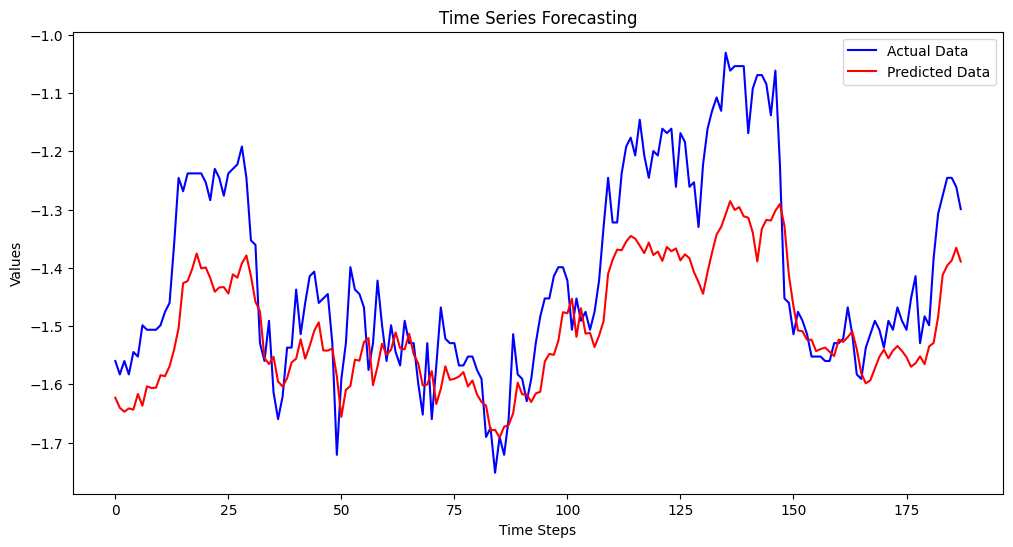

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Assuming predictions and true_labels are numpy arrays of the same shape
plt.figure(figsize=(12, 6))
plt.plot(true_labels[19300:, 0], label='Actual Data', color='blue')  # Adjust indexing based on your data shape
plt.plot(predictions[19300:, 0], label='Predicted Data', color='red')  # Adjust indexing based on your data shape
plt.title('Time Series Forecasting')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.show()